In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df= pd.read_csv("updated_ckd_dataset_with_stages.csv")

In [3]:
df.head()

,serum_creatinine,gfr,bun,serum_calcium,ana,c3_c4,hematuria,oxalate_levels,urine_ph,blood_pressure,...,smoking,alcohol,painkiller_usage,family_history,weight_changes,stress_level,months,cluster,ckd_pred,ckd_stage
0,0.683683,32.946784,7.553739,10.039896,0,138.204989,0,2.878164,7.864308,115.224217,...,yes,daily,no,yes,stable,low,10,5,CKD,3
1,3.809044,32.685035,141.347494,8.330543,1,24.282343,1,4.767639,4.920015,130.143900,...,yes,daily,no,yes,loss,moderate,1,2,CKD,3
2,1.143827,2.079805,15.979104,9.419229,0,163.970666,0,1.818613,6.188115,98.026072,...,no,daily,no,no,stable,moderate,4,6,CKD,5
3,4.804657,109.871407,53.307333,7.556631,1,71.056846,1,4.051686,5.278607,142.166650,...,no,never,yes,yes,stable,high,9,2,CKD,1
4,4.920235,42.214590,134.182157,7.289379,1,23.384639,1,3.240920,4.862923,151.962572,...,no,occasionally,yes,no,gain,high,7,2,CKD,3


In [4]:
df.isnull().sum()

serum_creatinine     0
gfr                  0
bun                  0
serum_calcium        0
ana                  0
c3_c4                0
hematuria            0
oxalate_levels       0
urine_ph             0
blood_pressure       0
physical_activity    0
diet                 0
water_intake         0
smoking              0
alcohol              0
painkiller_usage     0
family_history       0
weight_changes       0
stress_level         0
months               0
cluster              0
ckd_pred             0
ckd_stage            0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,serum_creatinine,gfr,bun,serum_calcium,ana,c3_c4,hematuria,oxalate_levels,urine_ph,blood_pressure,water_intake,months,cluster,ckd_stage
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.00000
mean,1.551423,51.735449,39.346088,8.537530,0.300000,109.757723,0.300000,2.624439,6.394566,119.747060,2.505405,6.584250,2.78550,2.91425
std,1.217478,34.389322,42.495106,1.403631,0.458315,46.556155,0.458315,1.088755,1.073232,25.218642,0.581993,3.416478,1.80992,1.39100
min,0.500273,0.021317,7.000920,5.002407,0.000000,10.027574,0.000000,1.000852,4.500576,90.019471,1.500627,1.000000,0.00000,0.00000
25%,0.758924,20.263808,11.632573,7.810761,0.000000,76.770105,0.000000,1.735248,5.248199,100.176525,2.004723,4.000000,2.00000,2.00000
50%,0.995209,50.054933,16.296667,8.982200,0.000000,115.511599,0.000000,2.432659,6.580794,111.116236,2.512182,7.000000,2.00000,3.00000
75%,2.065796,80.258482,67.090486,9.583627,1.000000,148.532716,1.000000,3.417216,7.305031,138.205563,3.015095,10.000000,4.00000,4.00000
max,4.994009,119.923482,149.999395,10.199344,1.000000,179.963970,1.000000,4.999965,7.999886,179.991991,3.499595,12.000000,6.00000,5.00000


### Behaviors effect on Kidney

In [7]:
print(df["water_intake"].nunique())

def check_water_intake(value):    
    if value < 1.8:
        return "Insufficient"        
    elif value < 2:
        return "Below Recommended"   
    elif value < 2.5:
        return "Adequate"           
    elif value >= 2.5:
        return "Above Recommended"  


4000


In [8]:
df["water_category"] = df["water_intake"].apply(check_water_intake)
print(df[["water_intake", "water_category"]].head())

   water_intake     water_category
0      2.314979           Adequate
1      2.250649           Adequate
2      2.542343  Above Recommended
3      2.640812  Above Recommended
4      3.148921  Above Recommended


In [9]:
df['CKD_Code'] = df['ckd_pred'].map({'Not CKD': 0, 'CKD': 1}).fillna(0).astype(int)
print(df[['ckd_pred', 'CKD_Code']].head())


# ===================================
print("\n")
# ===================================

df['Smoking_Code'] = df['smoking'].map({'no': 0, 'yes': 1}).fillna(0).astype(int)
print(df[['smoking', 'Smoking_Code']].head())

# ===================================
print("\n")
# ===================================

print(df["alcohol"].unique()) 

df['Alcohol_Code'] = df['alcohol'].map({'daily': 2, 'never': 0, 'occasionally': 1}).fillna(0).astype(int)
print(df[['alcohol', 'Alcohol_Code']].head())



  ckd_pred  CKD_Code
0      CKD         1
1      CKD         1
2      CKD         1
3      CKD         1
4      CKD         1


  smoking  Smoking_Code
0     yes             1
1     yes             1
2      no             0
3      no             0
4      no             0


['daily' 'never' 'occasionally']
        alcohol  Alcohol_Code
0         daily             2
1         daily             2
2         daily             2
3         never             0
4  occasionally             1


In [10]:
print(df["painkiller_usage"].unique()) 

df['painkiller_usage_Code'] = df['painkiller_usage'].map({'no': 0, 'yes': 1}).fillna(0).astype(int)
print(df[['painkiller_usage', 'painkiller_usage_Code']].head())

# ===================================
print("\n")
# ===================================

print(df["water_category"].unique()) 

df['water_category_Code'] = df['water_category'].map({'Insufficient': -1, 'Below Recommended': 0, 'Adequate': 1, 'Above Recommended': 2}).fillna(0).astype(int)
print(df[['water_category', 'water_category_Code']].head())

# ===================================
print("\n")
# ===================================

print(df["weight_changes"].unique()) 

df['weight_changes_Code'] = df['weight_changes'].map({'stable': 0, 'loss': -1, 'gain': 1}).fillna(0).astype(int)
print(df[['weight_changes', 'weight_changes_Code']].head())

['no' 'yes']
  painkiller_usage  painkiller_usage_Code
0               no                      0
1               no                      0
2               no                      0
3              yes                      1
4              yes                      1


['Adequate' 'Above Recommended' 'Insufficient' 'Below Recommended']
      water_category  water_category_Code
0           Adequate                    1
1           Adequate                    1
2  Above Recommended                    2
3  Above Recommended                    2
4  Above Recommended                    2


['stable' 'loss' 'gain']
  weight_changes  weight_changes_Code
0         stable                    0
1           loss                   -1
2         stable                    0
3         stable                    0
4           gain                    1


In [11]:
print(df["stress_level"].unique()) 

df['stress_level_Code'] = df['stress_level'].map({'moderate': 0, 'low': -1, 'high': 1}).fillna(0).astype(int)
print(df[['stress_level', 'stress_level_Code']].head())

# ===================================
print("\n")
# ===================================

print(df["physical_activity"].unique()) 

df['physical_activity_Code'] = df['physical_activity'].map({'weekly': 0, 'rarely': -1, 'daily': 1}).fillna(0).astype(int)
print(df[['physical_activity', 'physical_activity_Code']].head())

# ===================================
print("\n")
# ===================================

print(df["diet"].unique()) 

df['diet_Code'] = df['diet'].map({'balanced': 0, 'low salt': -1, 'high protein': 1}).fillna(0).astype(int)
print(df[['diet', 'diet_Code']].head())

['low' 'moderate' 'high']
  stress_level  stress_level_Code
0          low                 -1
1     moderate                  0
2     moderate                  0
3         high                  1
4         high                  1


['weekly' 'rarely' 'daily']
  physical_activity  physical_activity_Code
0            weekly                       0
1            weekly                       0
2            weekly                       0
3            rarely                      -1
4            weekly                       0


['high protein' 'low salt' 'balanced']
           diet  diet_Code
0  high protein          1
1  high protein          1
2      low salt         -1
3      low salt         -1
4      balanced          0


In [12]:

print(df["family_history"].unique()) 

df['family_history_Code'] = df['family_history'].map({'no': 0, 'yes': 1}).fillna(0).astype(int)
print(df[['family_history', 'family_history_Code']].head())


['yes' 'no']
  family_history  family_history_Code
0            yes                    1
1            yes                    1
2             no                    0
3            yes                    1
4             no                    0


In [13]:
selected_columns = [
    'CKD_Code',               
    'Smoking_Code',           
    'Alcohol_Code',           
    'painkiller_usage_Code',  
    'weight_changes_Code',   
    'stress_level_Code',
    'diet_Code',
    'physical_activity_Code',
    'water_category_Code',
   "family_history_Code"
         
]

Relation_Data = df[selected_columns].copy()
Relation_Data.head()

,CKD_Code,Smoking_Code,Alcohol_Code,painkiller_usage_Code,weight_changes_Code,stress_level_Code,diet_Code,physical_activity_Code,water_category_Code,family_history_Code
0,1,1,2,0,0,-1,1,0,1,1
1,1,1,2,0,-1,0,1,0,1,1
2,1,0,2,0,0,0,-1,0,2,0
3,1,0,0,1,0,1,-1,-1,2,1
4,1,0,1,1,1,1,0,0,2,0


In [14]:
correlation_matrix = Relation_Data.corr()
print("Behaviors effect on Kidney")
print(correlation_matrix['CKD_Code'].sort_values(ascending=False))

Behaviors effect on Kidney
CKD_Code                  1.000000
family_history_Code       0.031890
diet_Code                 0.013136
stress_level_Code         0.006709
physical_activity_Code   -0.001727
painkiller_usage_Code    -0.002152
weight_changes_Code      -0.006985
Smoking_Code             -0.007639
Alcohol_Code             -0.011744
water_category_Code      -0.014020
Name: CKD_Code, dtype: float64


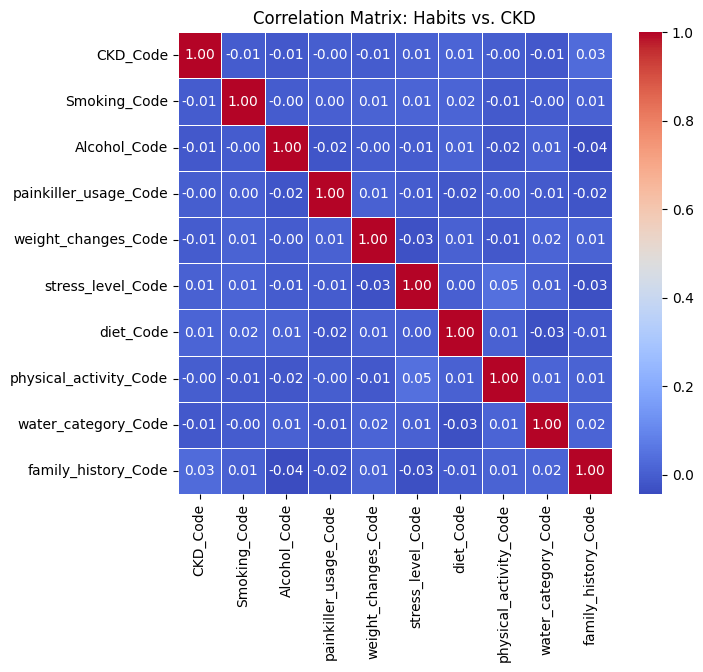

In [15]:
plt.figure(figsize=(7, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix: Habits vs. CKD')
plt.show()

In [16]:


contingency_table = pd.crosstab(df['smoking'], df['CKD_Code'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi2 Statistic:", chi2)
print("p-value:", p)

Chi2 Statistic: 0.1474787672202274
p-value: 0.7009564764919212


In [17]:
cols = ['stress_level_Code', 'physical_activity_Code', 'diet_Code', 'painkiller_usage_Code',
         "weight_changes_Code", "Smoking_Code", "Alcohol_Code", "water_category_Code", "family_history_Code"]

for col in cols:
    contingency_table = pd.crosstab(df[col], df['CKD_Code'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{col} -> p-value: {p:.4f}")


stress_level_Code -> p-value: 0.8977
physical_activity_Code -> p-value: 0.9678
diet_Code -> p-value: 0.5427
painkiller_usage_Code -> p-value: 0.9829
weight_changes_Code -> p-value: 0.8901
Smoking_Code -> p-value: 0.7010
Alcohol_Code -> p-value: 0.6346
water_category_Code -> p-value: 0.6028
family_history_Code -> p-value: 0.0541


stress_level_Code -> p-value: 0.8977


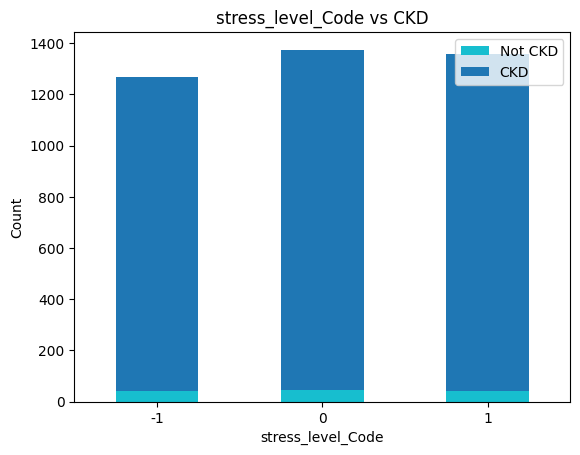

physical_activity_Code -> p-value: 0.9678


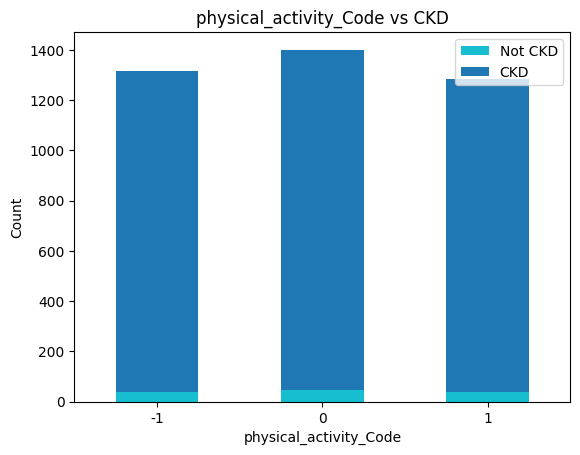

diet_Code -> p-value: 0.5427


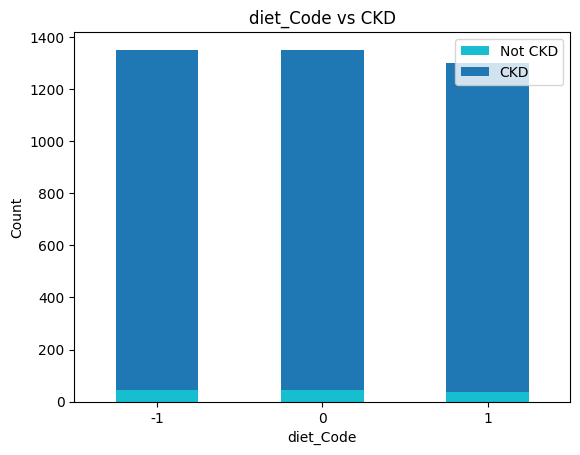

painkiller_usage_Code -> p-value: 0.9829


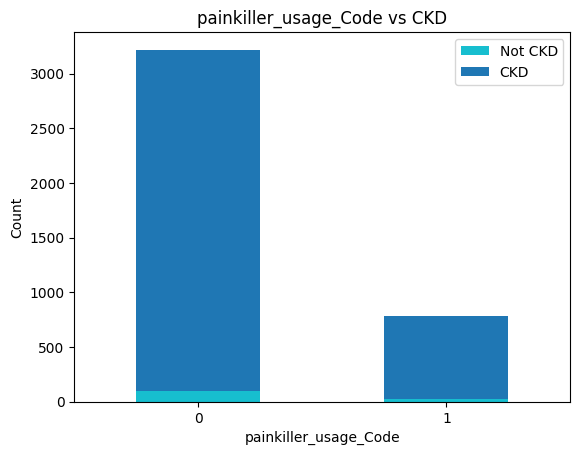

weight_changes_Code -> p-value: 0.8901


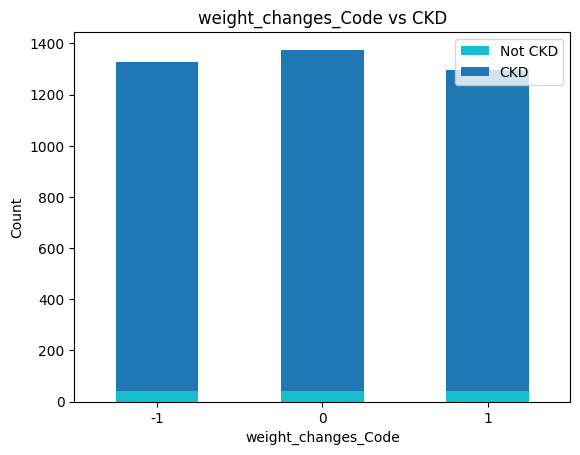

Smoking_Code -> p-value: 0.7010


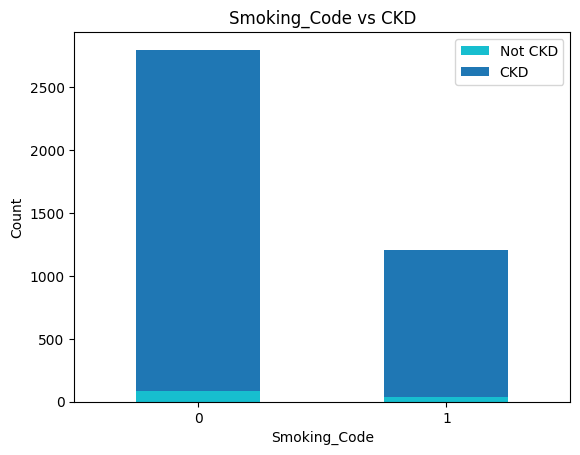

Alcohol_Code -> p-value: 0.6346


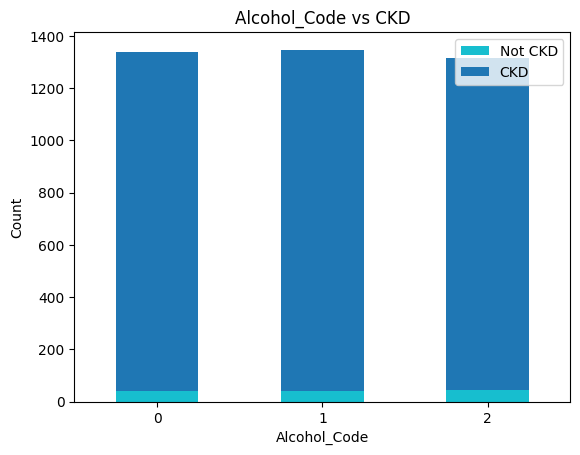

water_category_Code -> p-value: 0.6028


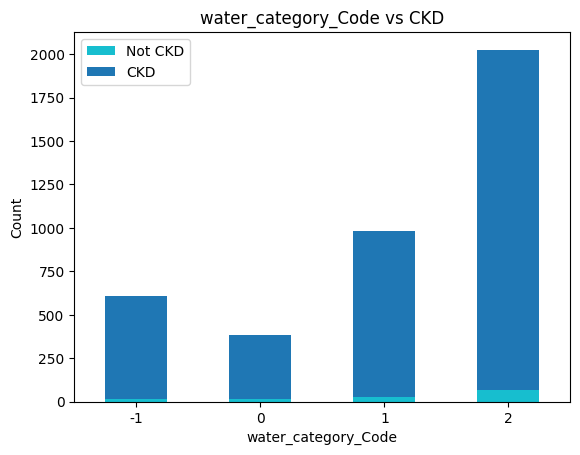

family_history_Code -> p-value: 0.0541


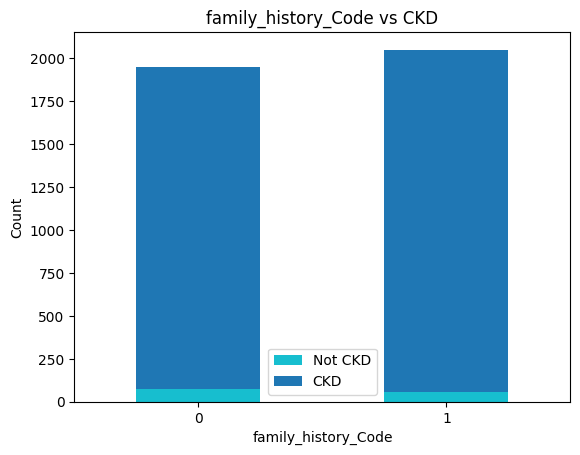


Columns sorted by significance (lowest p-value first):
family_history_Code: p-value = 0.0541
diet_Code: p-value = 0.5427
water_category_Code: p-value = 0.6028
Alcohol_Code: p-value = 0.6346
Smoking_Code: p-value = 0.7010
weight_changes_Code: p-value = 0.8901
stress_level_Code: p-value = 0.8977
physical_activity_Code: p-value = 0.9678
painkiller_usage_Code: p-value = 0.9829


In [18]:

results = []

for col in cols:
    contingency_table = pd.crosstab(df[col], df['CKD_Code'])
    
    # Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    results.append((col, p))
    
    print(f"{col} -> p-value: {p:.4f}")
    
    contingency_table.plot(kind='bar', stacked=True, color=['tab:cyan','tab:blue'])
    plt.title(f"{col} vs CKD")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.legend(["Not CKD", "CKD"])
    plt.show()

results.sort(key=lambda x: x[1])
print("\nColumns sorted by significance (lowest p-value first):")
for col, p in results:
    print(f"{col}: p-value = {p:.4f}")


### Medical Indicators effect on CKD Stage

In [19]:
df.head()

,serum_creatinine,gfr,bun,serum_calcium,ana,c3_c4,hematuria,oxalate_levels,urine_ph,blood_pressure,...,CKD_Code,Smoking_Code,Alcohol_Code,painkiller_usage_Code,water_category_Code,weight_changes_Code,stress_level_Code,physical_activity_Code,diet_Code,family_history_Code
0,0.683683,32.946784,7.553739,10.039896,0,138.204989,0,2.878164,7.864308,115.224217,...,1,1,2,0,1,0,-1,0,1,1
1,3.809044,32.685035,141.347494,8.330543,1,24.282343,1,4.767639,4.920015,130.143900,...,1,1,2,0,1,-1,0,0,1,1
2,1.143827,2.079805,15.979104,9.419229,0,163.970666,0,1.818613,6.188115,98.026072,...,1,0,2,0,2,0,0,0,-1,0
3,4.804657,109.871407,53.307333,7.556631,1,71.056846,1,4.051686,5.278607,142.166650,...,1,0,0,1,2,0,1,-1,-1,1
4,4.920235,42.214590,134.182157,7.289379,1,23.384639,1,3.240920,4.862923,151.962572,...,1,0,1,1,2,1,1,0,0,0


In [20]:
cols_Med= ['serum_creatinine', 'gfr', 'bun', 'serum_calcium', 'ana', 'c3_c4', 'hematuria', 'oxalate_levels',
            'urine_ph', 'blood_pressure', 'cluster', 'ckd_stage']

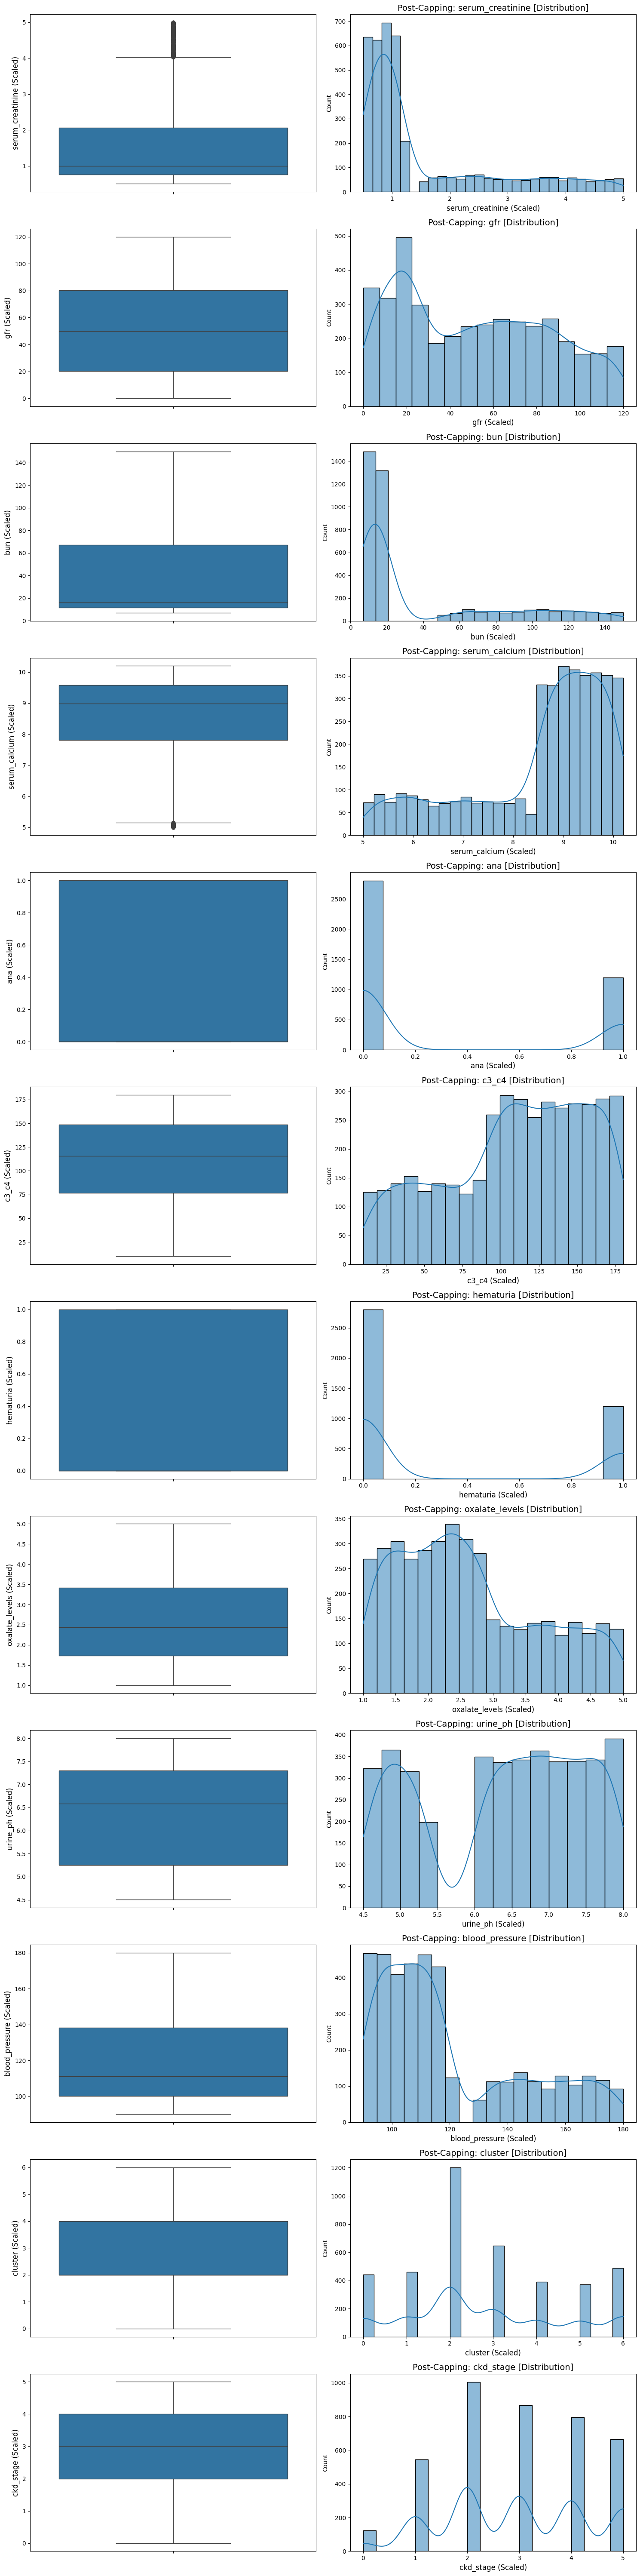

In [21]:
n_cols = len(cols_Med)

plt.figure(figsize=(15, 5 * n_cols))


# (Boxplot)
for i, col in enumerate(cols_Med):
   # enumerate returns both the index and the column name
   # enumerate → gives (index + column)

    plt.subplot(n_cols, 2, 2*i + 1)
    # subplot(rows, columns, subplot_number)
    # subplot_number → position of this plot within the grid
    # 2*i + 1 => odd pos

    sns.boxplot(y=df[col])
    plt.ylabel(f'{col} (Scaled)', fontsize=12)

# (Distribution)
    plt.subplot(n_cols, 2, 2*i + 2)
    # 2*i + 1 => even pos
    sns.histplot(df[col], kde=True)
    plt.title(f'Post-Capping: {col} [Distribution]', fontsize=14)
    plt.xlabel(f'{col} (Scaled)', fontsize=12)

plt.tight_layout() # automatically adjusts spacing between subplots to prevent overlap

plt.show()

In [22]:
# الله يخليه كفافي مكنتش بفهم منه كلمه الحمد لله بقى خد الشر وراح

# ♥ ELgouhay AI




for col in cols_Med:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])


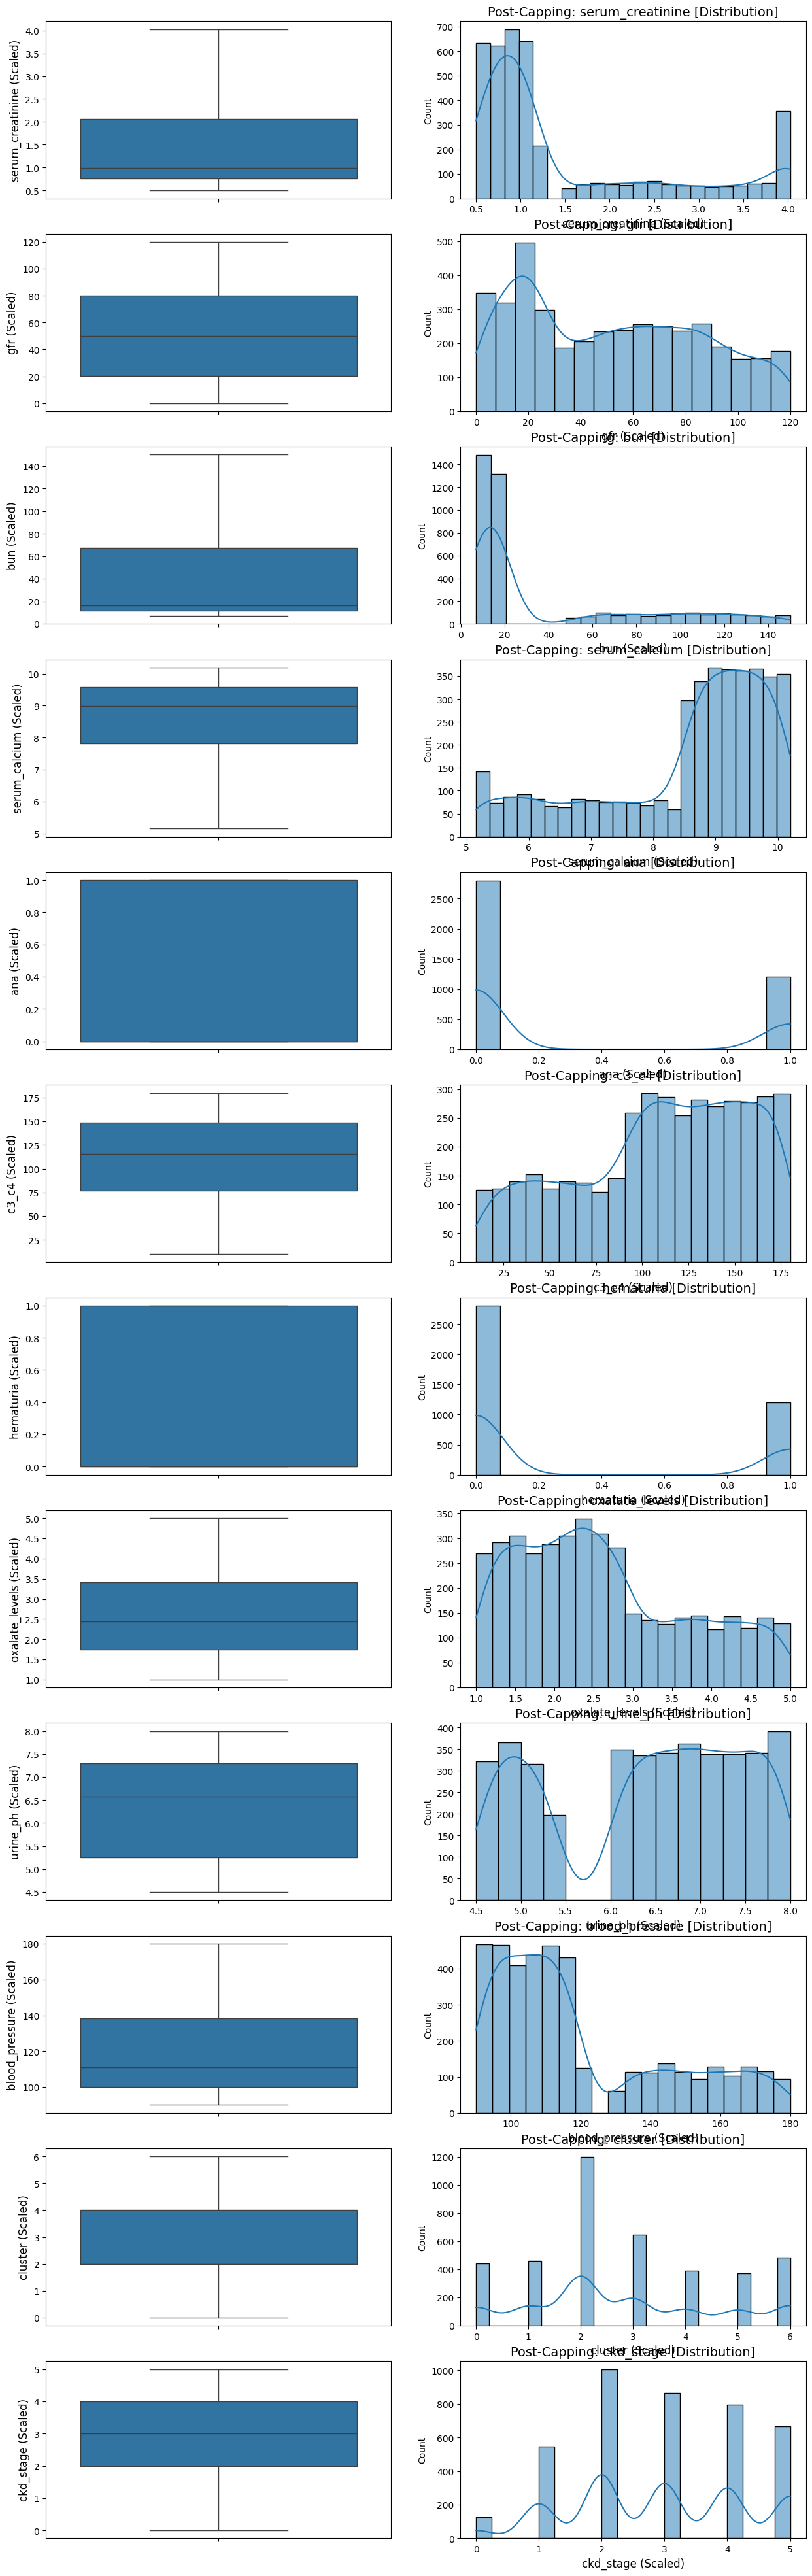

In [23]:
n_cols = len(cols_Med)

plt.figure(figsize=(15, 50))


# (Boxplot)
for i, col in enumerate(cols_Med):
    plt.subplot(n_cols, 2, 2*i + 1)
    sns.boxplot(y=df[col])
    plt.ylabel(f'{col} (Scaled)', fontsize=12)

# (Distribution)
    plt.subplot(n_cols, 2, 2*i + 2)
    sns.histplot(df[col], kde=True)
    plt.title(f'Post-Capping: {col} [Distribution]', fontsize=14)
    plt.xlabel(f'{col} (Scaled)', fontsize=12)

# plt.tight_layout()
plt.show()

### Cluster

In [24]:
print(df["cluster"].unique()) 

[5. 2. 6. 1. 0. 3. 4.]


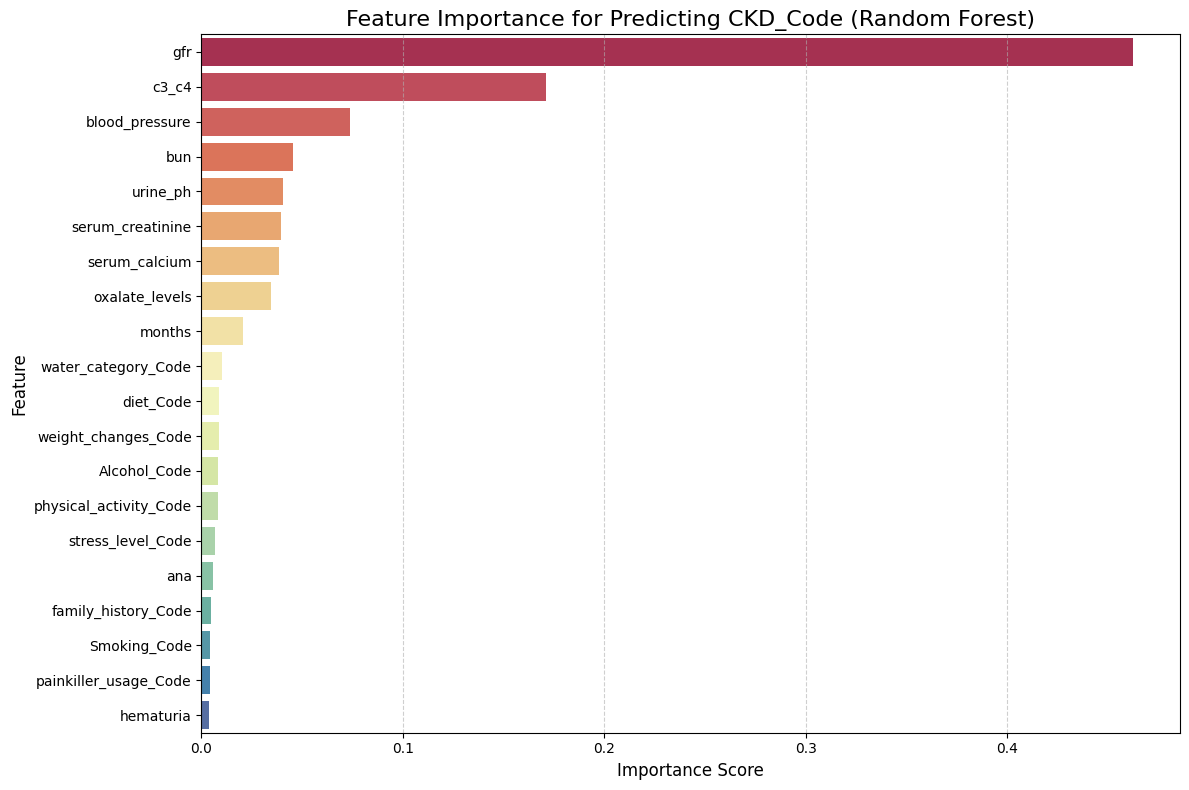

                   Feature  Importance
0                      gfr    0.462504
1                    c3_c4    0.170876
2           blood_pressure    0.073518
3                      bun    0.045364
4                 urine_ph    0.040428
5         serum_creatinine    0.039253
6            serum_calcium    0.038733
7           oxalate_levels    0.034696
8                   months    0.020451
9      water_category_Code    0.010099
10               diet_Code    0.008719
11     weight_changes_Code    0.008677
12            Alcohol_Code    0.008405
13  physical_activity_Code    0.008317
14       stress_level_Code    0.006819
15                     ana    0.005979
16     family_history_Code    0.004931
17            Smoking_Code    0.004310
18   painkiller_usage_Code    0.004262
19               hematuria    0.003658


In [25]:
all_features_list = [
    'serum_creatinine', 'gfr', 'bun', 'serum_calcium', 'ana', 'c3_c4', 'hematuria', 
    'oxalate_levels', 'urine_ph', 'blood_pressure', 
    'Smoking_Code', 'Alcohol_Code', 'painkiller_usage_Code', 'weight_changes_Code', 
    'stress_level_Code', 'diet_Code', 'physical_activity_Code', 'water_category_Code', 
    "family_history_Code", 'months'
]

feature_cols = [col for col in all_features_list if col in df.columns]



scaler = StandardScaler()
df_scaled = df.copy()

numeric_features = df_scaled[feature_cols].select_dtypes(include=['int64', 'float64']).columns
df_scaled[numeric_features] = scaler.fit_transform(df_scaled[numeric_features])


X = df_scaled[feature_cols]
Y = df['CKD_Code']  


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, Y)


importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
    }).sort_values(by='Importance', ascending=False).reset_index(drop=True)


plt.figure(figsize=(12, 8))
sns.barplot(
    x='Importance', 
    y='Feature', 
    data=importance_df, 
    palette='Spectral',
    hue= "Feature"
)
plt.title('Feature Importance for Predicting CKD_Code (Random Forest)', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


print(importance_df)

In [26]:
# Select Columns

cols_Med_features = [
'gfr', 'c3_c4', 'blood_pressure', 'serum_creatinine', 'serum_calcium', 
    'bun', 'urine_ph', 'oxalate_levels', 'months'
]

feature_cols = [col for col in cols_Med_features if col in df.columns]
X = df[feature_cols]

In [27]:
# Calc Silhouette Score & k



silhouette_scores = []
k_values = range(2, 9) 


# k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    
# Silhouette Score
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)
    
    print(f"   - K= {k}: Score = {score:.4f}")

# get best (k)
best_k = k_values[np.argmax(silhouette_scores)]
best_score = max(silhouette_scores)

   - K= 2: Score = 0.5752
   - K= 3: Score = 0.4213
   - K= 4: Score = 0.3637
   - K= 5: Score = 0.3415
   - K= 6: Score = 0.3373
   - K= 7: Score = 0.3266
   - K= 8: Score = 0.3229


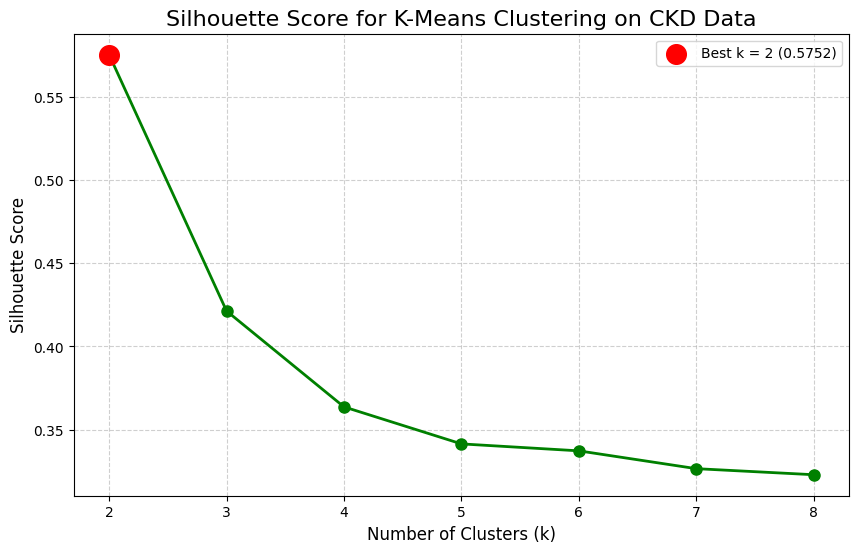


 The best Silhouette Score is: k= 2 (Score: 0.5752)


In [28]:
plt.figure(figsize=(10, 6))

plt.plot(
    k_values, 
    silhouette_scores, 
    marker='o', 
    color='green', 
    linewidth=2, 
    markersize=8
)

plt.scatter(best_k, best_score, color='red', s=200, label=f'Best k = {best_k} ({best_score:.4f})', zorder=5)

plt.title('Silhouette Score for K-Means Clustering on CKD Data', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.xticks(k_values) 
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print(f"\n The best Silhouette Score is: k= {best_k} (Score: {best_score:.4f})")

In [29]:
#  Calinski–Harabasz Score

calinski_harabasz_scores = []


for k in k_values:
    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    
    # Calinski–Harabasz Score
    score = calinski_harabasz_score(X, kmeans.labels_)
    calinski_harabasz_scores.append(score)
    
    print(f"   - K={k}: Score = {score:.2f}")

# Max Score
best_k_ch = k_values[np.argmax(calinski_harabasz_scores)]
best_score_ch = max(calinski_harabasz_scores)

   - K=2: Score = 6625.01
   - K=3: Score = 5462.69
   - K=4: Score = 4690.47
   - K=5: Score = 4431.71
   - K=6: Score = 4228.39
   - K=7: Score = 4050.63
   - K=8: Score = 3849.79


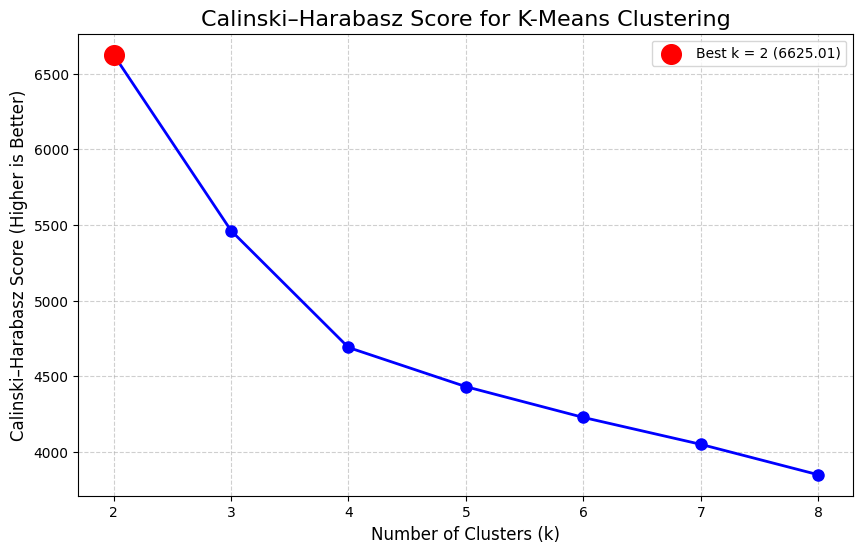


 The best Calinski–Harabasz Score is : K = 2 (Score: 6625.01)


In [30]:
plt.figure(figsize=(10, 6))

plt.plot(
    k_values, 
    calinski_harabasz_scores, 
    marker='o', 
    color='blue', 
    linewidth=2, 
    markersize=8
)


plt.scatter(best_k_ch, best_score_ch, color='red', s=200, 
            label=f'Best k = {best_k_ch} ({best_score_ch:.2f})', zorder=5)

plt.title('Calinski–Harabasz Score for K-Means Clustering', fontsize=16)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Calinski–Harabasz Score (Higher is Better)', fontsize=12)
plt.xticks(k_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print(f"\n The best Calinski–Harabasz Score is : K = {best_k_ch} (Score: {best_score_ch:.2f})")

In [31]:
# Get PCA

# PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


#  kmeans_PCA
kmeans_pca = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans_pca.fit_predict(X_pca)

# DataFrame_PCA
df_pca = pd.DataFrame(data=X_pca, columns=['Principal_Component_1', 'Principal_Component_2'])
df_pca['Cluster'] = cluster_labels

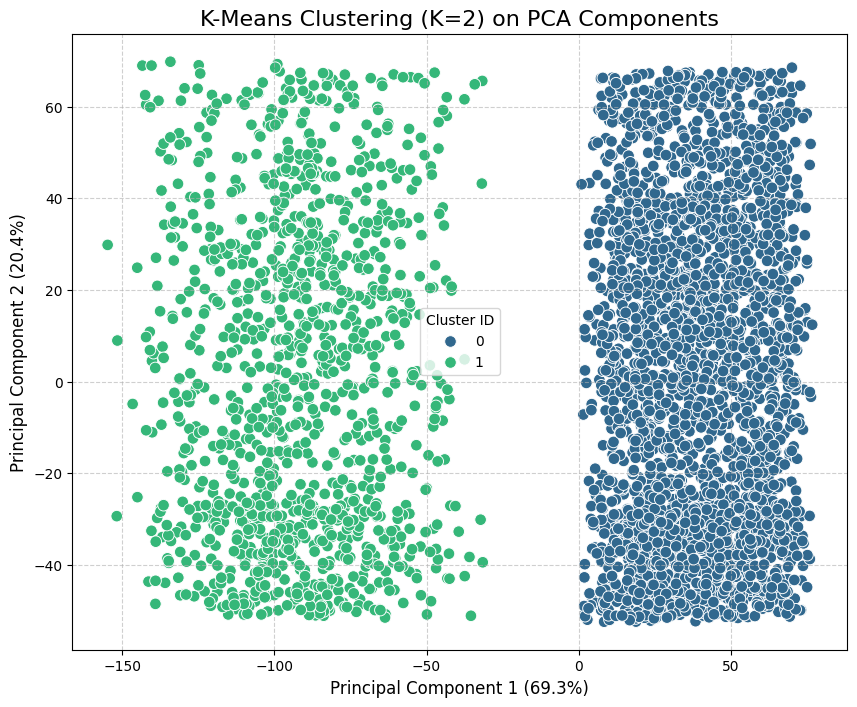

In [32]:

plt.figure(figsize=(10, 8))

sns.scatterplot(
    x='Principal_Component_1', 
    y='Principal_Component_2', 
    hue='Cluster', 
    data=df_pca, 
    palette='viridis', 
    legend='full',
    s=70 
)

plt.title('K-Means Clustering (K=2) on PCA Components', fontsize=16)
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.1f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.1f}%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster ID')
plt.show()

In [33]:
# Scaling


scaler = StandardScaler()
X = df[feature_cols].copy()
X[feature_cols] = scaler.fit_transform(X[feature_cols])



pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


# Test cluster
K_value = 6
kmeans_pca = KMeans(n_clusters=K_value, random_state=42, n_init=10)
cluster_labels = kmeans_pca.fit_predict(X_pca)

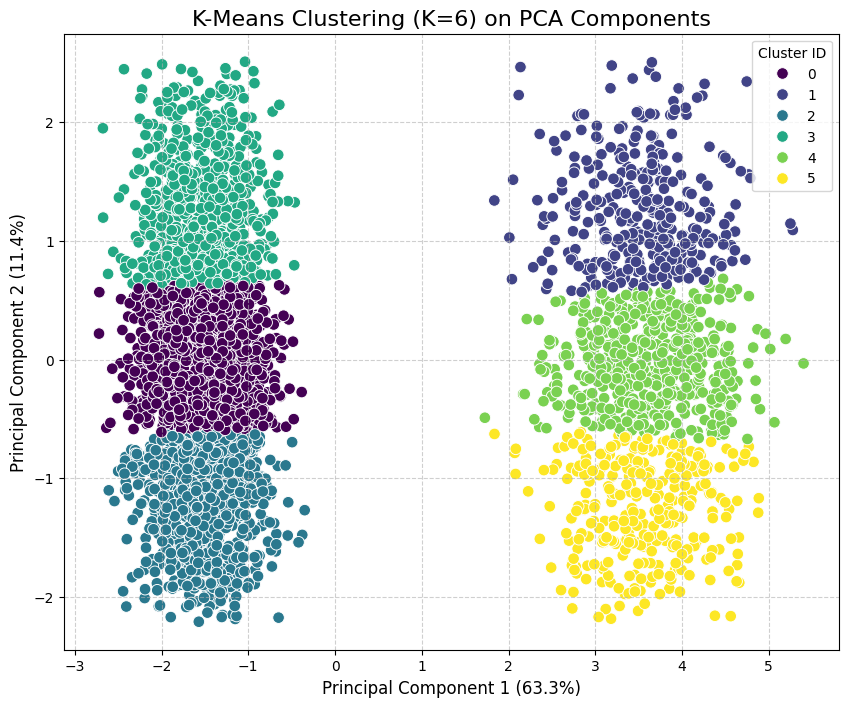

In [34]:
df_pca = pd.DataFrame(data=X_pca, columns=['Principal_Component_1', 'Principal_Component_2'])
df_pca['Cluster'] = cluster_labels

plt.figure(figsize=(10, 8))

sns.scatterplot(
    x='Principal_Component_1', 
    y='Principal_Component_2', 
    hue='Cluster', 
    data=df_pca, 
    palette='viridis', 
    legend='full',
    s=70 
)

explained_variance_pc1 = pca.explained_variance_ratio_[0]*100
explained_variance_pc2 = pca.explained_variance_ratio_[1]*100

plt.title(f'K-Means Clustering (K={K_value}) on PCA Components', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance_pc1:.1f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance_pc2:.1f}%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Cluster ID')
plt.show()

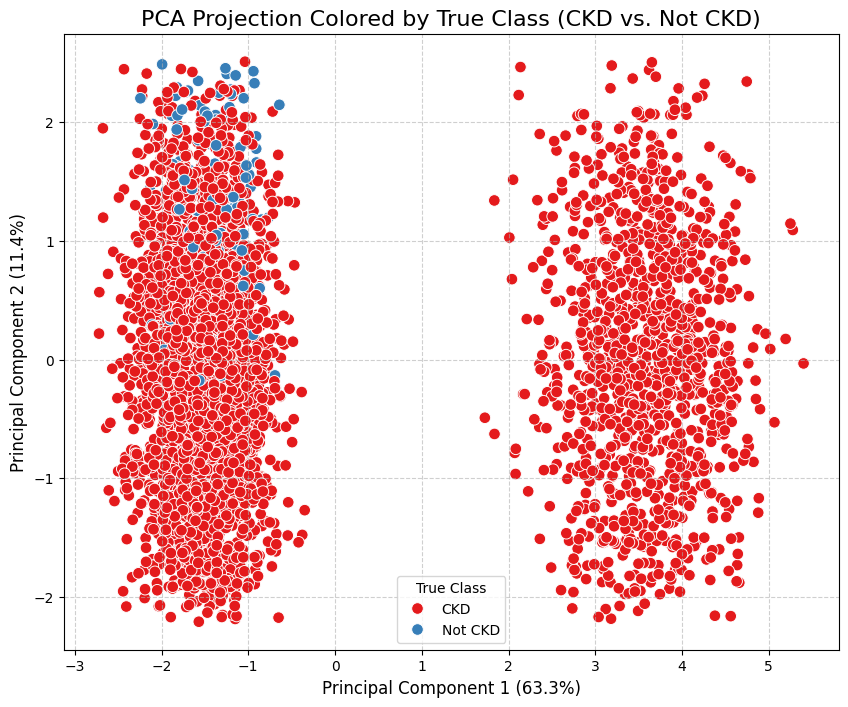

In [35]:
# CDK VS Not CDK

df_pca = pd.DataFrame(data=X_pca, columns=['Principal_Component_1', 'Principal_Component_2'])
df_pca['Class'] = df['CKD_Code'] # استخدام الكود الحقيقي للتلوين
df_pca['Class_Label'] = df_pca['Class'].map({1: 'CKD', 0: 'Not CKD'})


plt.figure(figsize=(10, 8))

sns.scatterplot(
    x='Principal_Component_1', 
    y='Principal_Component_2', 
    hue='Class_Label', 
    data=df_pca, 
    palette='Set1', 
    legend='full',
    s=70 
)

# 
explained_variance_pc1 = pca.explained_variance_ratio_[0]*100
explained_variance_pc2 = pca.explained_variance_ratio_[1]*100

plt.title('PCA Projection Colored by True Class (CKD vs. Not CKD)', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance_pc1:.1f}%)', fontsize=12)
plt.ylabel(f'Principal Component 2 ({explained_variance_pc2:.1f}%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='True Class')
plt.show()

In [36]:
X_reduced = df_scaled[cols_Med_features]
Y = df['CKD_Code'] 


X_train_reduced, X_test_reduced, Y_train, Y_test = train_test_split(
               X_reduced, Y, test_size=0.3, random_state=42, stratify=Y)


rf_model_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_reduced.fit(X_train_reduced, Y_train)


Y_pred_reduced = rf_model_reduced.predict(X_test_reduced)
accuracy_reduced = accuracy_score(Y_test, Y_pred_reduced)


print(f"Accuracy Score: {accuracy_reduced:.4f}")
print("\nClassification Report:")
print(classification_report(Y_test, Y_pred_reduced))

Accuracy Score: 0.9908

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.74      0.84        38
           1       0.99      1.00      1.00      1162

    accuracy                           0.99      1200
   macro avg       0.98      0.87      0.92      1200
weighted avg       0.99      0.99      0.99      1200



In [37]:
print(f"Accuracy Score: {accuracy_reduced:.4f}")

report_dict = classification_report(Y_test, Y_pred_reduced, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose() 
# transpose:
# الله يمسيكبالخير  يا كفكا
display(report_df)

Accuracy Score: 0.9908


,precision,recall,f1-score,support
0,0.965517,0.736842,0.835821,38.000000
1,0.991460,0.999139,0.995285,1162.000000
accuracy,0.990833,0.990833,0.990833,0.990833
macro avg,0.978489,0.867991,0.915553,1200.000000
weighted avg,0.990639,0.990833,0.990235,1200.000000


In [38]:
columns_to_drop = [
    'smoking', 
    'alcohol', 
    'stress_level', 
    'diet', 
    'water_intake',
    'ckd_pred',
    'physical_activity', 
    'smoking', 
    'painkiller_usage', 
    'family_history',
    "water_category",
    "weight_changes"

]


cleaned= df.drop(columns=columns_to_drop, axis=1)

cleaned.head()

,serum_creatinine,gfr,bun,serum_calcium,ana,c3_c4,hematuria,oxalate_levels,urine_ph,blood_pressure,...,CKD_Code,Smoking_Code,Alcohol_Code,painkiller_usage_Code,water_category_Code,weight_changes_Code,stress_level_Code,physical_activity_Code,diet_Code,family_history_Code
0,0.683683,32.946784,7.553739,10.039896,0.0,138.204989,0.0,2.878164,7.864308,115.224217,...,1,1,2,0,1,0,-1,0,1,1
1,3.809044,32.685035,141.347494,8.330543,1.0,24.282343,1.0,4.767639,4.920015,130.143900,...,1,1,2,0,1,-1,0,0,1,1
2,1.143827,2.079805,15.979104,9.419229,0.0,163.970666,0.0,1.818613,6.188115,98.026072,...,1,0,2,0,2,0,0,0,-1,0
3,4.026104,109.871407,53.307333,7.556631,1.0,71.056846,1.0,4.051686,5.278607,142.166650,...,1,0,0,1,2,0,1,-1,-1,1
4,4.026104,42.214590,134.182157,7.289379,1.0,23.384639,1.0,3.240920,4.862923,151.962572,...,1,0,1,1,2,1,1,0,0,0


In [39]:
cleaned.to_csv("Kidney_Cleaned.csv", index=False)
print("Done")

Done


### Training

In [40]:

# ================================
#  Define Features & Target
# ================================
X = cleaned.drop("CKD_Code", axis=1)
y = cleaned["CKD_Code"]

# ================================
#  Split Data
# ================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ================================
#  Train the Model
# ================================
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

model.fit(X_train, y_train)

# ================================
#  Predictions
# ================================
y_pred = model.predict(X_test)

# ================================
#  Evaluation
# ================================
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00       777

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800


Confusion Matrix:
[[ 23   0]
 [  0 777]]


In [41]:

importances = model.feature_importances_
feature_names = X.columns

importance_cleaned = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(importance_cleaned)

                   Feature  Importance
12               ckd_stage    0.636625
1                      gfr    0.176052
5                    c3_c4    0.049784
9           blood_pressure    0.023959
2                      bun    0.018187
0         serum_creatinine    0.017994
3            serum_calcium    0.015749
8                 urine_ph    0.014759
7           oxalate_levels    0.013202
11                 cluster    0.007341
10                  months    0.004721
20               diet_Code    0.003047
4                      ana    0.002512
16     water_category_Code    0.002443
17     weight_changes_Code    0.002373
14            Alcohol_Code    0.002250
18       stress_level_Code    0.002221
6                hematuria    0.002113
19  physical_activity_Code    0.001531
21     family_history_Code    0.001129
13            Smoking_Code    0.001108
15   painkiller_usage_Code    0.000899


In [42]:
# Logistic 



X = cleaned[cols_Med_features]
y_ckd = cleaned["CKD_Code"]        
y_stage = cleaned["ckd_stage"]     
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_ckd, test_size=0.2, random_state=42)
model_ckd = LogisticRegression(max_iter=1000, random_state=42)
model_ckd.fit(X_train, y_train)



y_pred = model_ckd.predict(X_test)
print("Accuracy (CKD Diagnosis):", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy (CKD Diagnosis): 0.99375

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        23
           1       0.99      1.00      1.00       777

    accuracy                           0.99       800
   macro avg       1.00      0.89      0.94       800
weighted avg       0.99      0.99      0.99       800



In [43]:
# Get stage
cleaned_ckd_only = cleaned[cleaned["CKD_Code"] == 1]  
X_stage = cleaned_ckd_only[cols_Med_features]
y_stage_only = cleaned_ckd_only["ckd_stage"]

# Scale
X_stage_scaled = scaler.transform(X_stage)

# Split
X_stage_train, X_stage_test, y_stage_train, y_stage_test = train_test_split(
    X_stage_scaled, y_stage_only, test_size=0.2, random_state=42
)

# Train Stage Model
model_stage = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial')
model_stage.fit(X_stage_train, y_stage_train)

# Evaluate Stage Model
y_stage_pred = model_stage.predict(X_stage_test)
print("\nAccuracy (Stage Prediction):", accuracy_score(y_stage_test, y_stage_pred))
print("\nClassification Report (Stage):")
print(classification_report(y_stage_test, y_stage_pred))

c:\Users\smart tec\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Accuracy (Stage Prediction): 0.9535483870967741

Classification Report (Stage):
              precision    recall  f1-score   support

         1.0       1.00      0.93      0.96       121
         2.0       0.94      0.99      0.97       196
         3.0       0.99      0.91      0.95       170
         4.0       0.88      0.99      0.93       157
         5.0       0.99      0.93      0.96       131

    accuracy                           0.95       775
   macro avg       0.96      0.95      0.95       775
weighted avg       0.96      0.95      0.95       775



In [44]:
def predict_patient(new_data_cleaned):
    # Scale
    new_scaled = scaler.transform(new_data_cleaned)
    
    # 1) CKD diagnosis
    ckd_pred = model_ckd.predict(new_scaled)[0]
    
    if ckd_pred == 0:
        return "The patient is healthy."
    
    # 2) Stage prediction
    stage_pred = model_stage.predict(new_scaled)[0]
    return f"The patient has CKD.\nStage: {stage_pred}"


In [45]:
# Test
new_patient = pd.DataFrame([{
    'gfr': 45,
    'c3_c4': 1.1,
    'blood_pressure': 150,
    'serum_creatinine': 2.1,
    'serum_calcium': 8.5,
    'bun': 28,
    'urine_ph': 6.0,
    'oxalate_levels': 0.5,
    'months': 6
}])

print(predict_patient(new_patient))


The patient has CKD.
Stage: 3.0


In [46]:
# Random Forest

df_ckd_only = df[df["CKD_Code"] == 1]   
X_stage = df_ckd_only[cols_Med_features]
y_stage_only = df_ckd_only["ckd_stage"]

X_stage_scaled = scaler.transform(X_stage)

X_stage_train, X_stage_test, y_stage_train, y_stage_test = train_test_split(
    X_stage_scaled, y_stage_only, test_size=0.2, random_state=42
)

model_stage = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
model_stage.fit(X_stage_train, y_stage_train)

y_stage_pred = model_stage.predict(X_stage_test)
print("Accuracy (Stage Prediction):", accuracy_score(y_stage_test, y_stage_pred))
print(classification_report(y_stage_test, y_stage_pred))

Accuracy (Stage Prediction): 0.9974193548387097
              precision    recall  f1-score   support

         1.0       1.00      0.98      0.99       121
         2.0       0.99      1.00      0.99       196
         3.0       1.00      1.00      1.00       170
         4.0       1.00      1.00      1.00       157
         5.0       1.00      1.00      1.00       131

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



In [47]:
def predict_patient(new_data_df):
    new_scaled = scaler.transform(new_data_df)
    
    # 1) CKD diagnosis
    ckd_pred = model_ckd.predict(new_scaled)[0]
    
    if ckd_pred == 0:
        return "The patient is healthy."
    
    # 2) Stage prediction
    stage_pred = model_stage.predict(new_scaled)[0]
    return f"The patient has CKD.\nStage: {stage_pred}"


In [48]:
new_patient = pd.DataFrame([{
    'gfr': 70,              
    'c3_c4': 1.5,            
    'blood_pressure': 130,  
    'serum_creatinine': 1.2, 
    'serum_calcium': 9.0,    
    'bun': 20,               
    'urine_ph': 5.5,      
    'oxalate_levels': 0.8,   
    'months': 3             
}])


print(predict_patient(new_patient))


The patient has CKD.
Stage: 2.0
